In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
pyber_ride_df=pd.read_csv("Resources/PyBer_ride_data.csv")
city_data_df=pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [3]:
pyber_data_df =pd.merge(ride_data_df, city_data_df)

In [4]:
rides_df=pyber_data_df[['type','ride_id']].groupby(['type']).count()

drivers_df=pyber_data_df[['type','city','driver_count']].groupby(['city']).min().groupby(['type']).sum()
fares_df=pyber_data_df[['type','fare']].groupby(['type']).sum()
avfperride_df=fares_df['fare']/rides_df['ride_id']
avfperdriver_df=fares_df['fare']/drivers_df['driver_count']


In [5]:
summary_Df=pd.DataFrame({'Total Rides':rides_df['ride_id'],'Total Drivers':drivers_df['driver_count'],
                        'Total Fares':fares_df['fare'], 'Average Fares per Ride':avfperride_df, 'Average Fares per Driver':avfperdriver_df})
summary_Df.index.name= None

In [6]:
summary_Df['Total Fares']=summary_Df['Total Fares'].map('${:,.2f}'.format)
summary_Df['Average Fares per Driver']=summary_Df['Average Fares per Driver'].map('${:,.2f}'.format)
summary_Df['Average Fares per Ride']=summary_Df['Average Fares per Ride'].map('${:,.2f}'.format)


In [7]:
summary_Df

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fares per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [8]:
pyber_data_df=pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 
                              'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})


In [9]:
faresframe=pyber_data_df.copy()[['Date','City Type', 'Fare']]

faresframe['Date']=pd.to_datetime(faresframe['Date'])

faresframe=faresframe.set_index('Date')
dailyfares=faresframe.groupby('City Type').resample('D').sum()

In [10]:
dailyfares=dailyfares.reset_index()

In [11]:
piv=dailyfares.pivot(index='Date',columns='City Type')

In [12]:
#Cut off tail
till_may_df=piv.loc['2019-01-01':'2019-04-28']

In [13]:
#Find weekly fares by city type
weekly_fare=till_may_df.resample('W').sum()
weekly_fare['Fare']

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


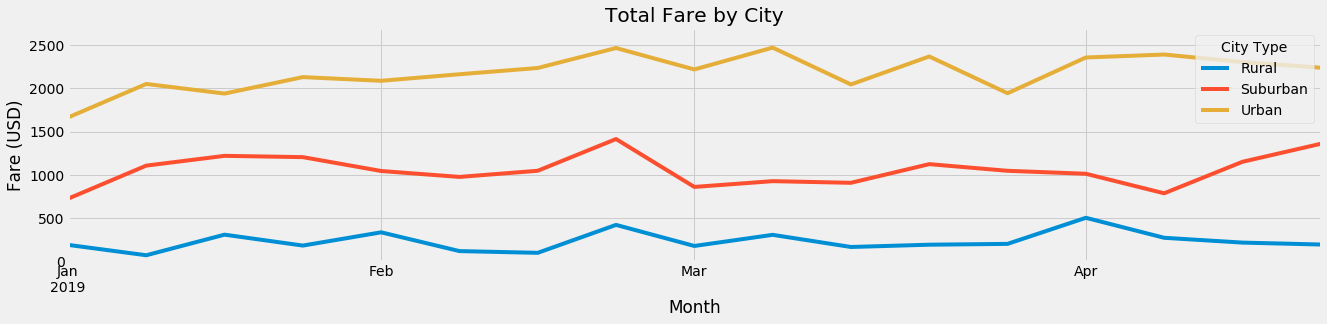

In [14]:
plt.style.use('fivethirtyeight')
weekly_fare['Fare'].plot(figsize=(20,4),title='Total Fare by City',ylim=(0,2700))
plt.ylabel('Fare (USD)')
plt.xlabel('Month')
plt.savefig('analysis/Fig8.png')